# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')
c1=cm.get_cmap('Set1')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Reading Data</p>

In [2]:
data=pd.read_csv("/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv")

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [4]:
data.drop(['title','residenceStateRegion','state','organization','personName'],axis=1,inplace=True)

In [5]:
data.duplicated().sum()

0

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2639
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2369 non-null   int64  
 1   finalWorth                                  2369 non-null   int64  
 2   category                                    2369 non-null   object 
 3   age                                         2369 non-null   float64
 4   country                                     2369 non-null   object 
 5   city                                        2369 non-null   object 
 6   source                                      2369 non-null   object 
 7   industries                                  2369 non-null   object 
 8   countryOfCitizenship                        2369 non-null   object 
 9   selfMade                                    2369 non-null   bool   
 10  status           

In [8]:
data['Name']=data['firstName']+" "+data['lastName']
data.drop(['firstName','lastName'],axis=1,inplace=True)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Visualization</p>

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Selfmade Business Person</p>
</div>


Text(0.5, 1.0, 'SelfMade Business Person')

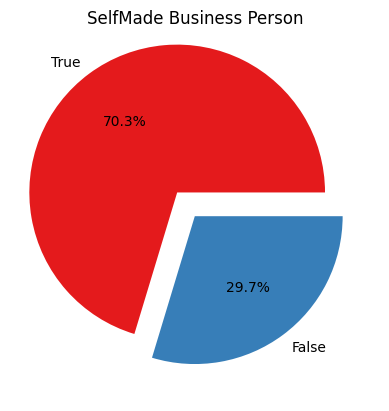

In [9]:
plt.pie(data.selfMade.value_counts(),colors=[c1(0.1),c1(0.2)],labels=data.selfMade.value_counts().index,autopct="%1.1f%%",explode=(0.2,0))
plt.title("SelfMade Business Person")

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Age Frequency</p>
</div>


Text(0, 0.5, 'Frequency')

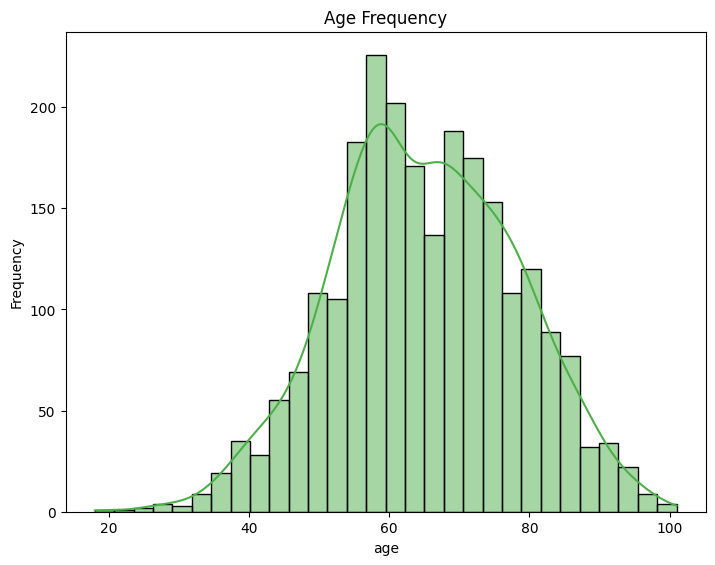

In [10]:
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
sb.histplot(data=data,x="age",ax=ax,kde=True,color=c1(0.3))

ax.set_title("Age Frequency")
ax.set_ylabel("Frequency")


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Category Frequency</p>
</div>


Text(0.5, 1.0, 'Category Frequency')

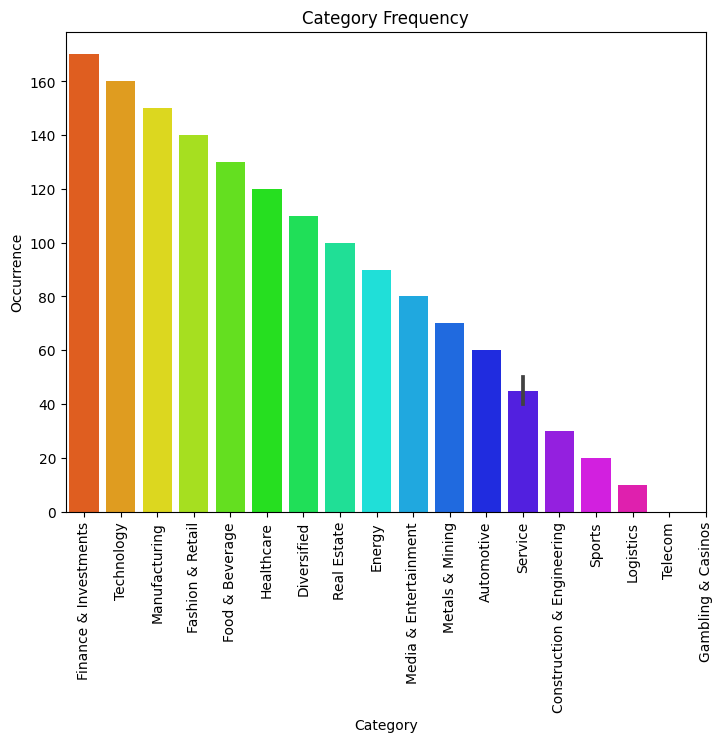

In [11]:
val1=data.category.value_counts()
fig1=plt.figure()
axe=fig1.add_axes([1,1,1,1])
sb.barplot(x=val1,y=[i for i in range(0,180,10)],ax=axe,palette="hsv")
axe.set_xticks(range(len(val1)),val1.index,rotation=90)
axe.set_xlabel("Category")
axe.set_ylabel("Occurrence")
axe.set_title("Category Frequency")

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 10 many billionaires holding Countries</p>
</div>


Text(0.5, 1.0, 'Top 10 many billionaires holding Countries')

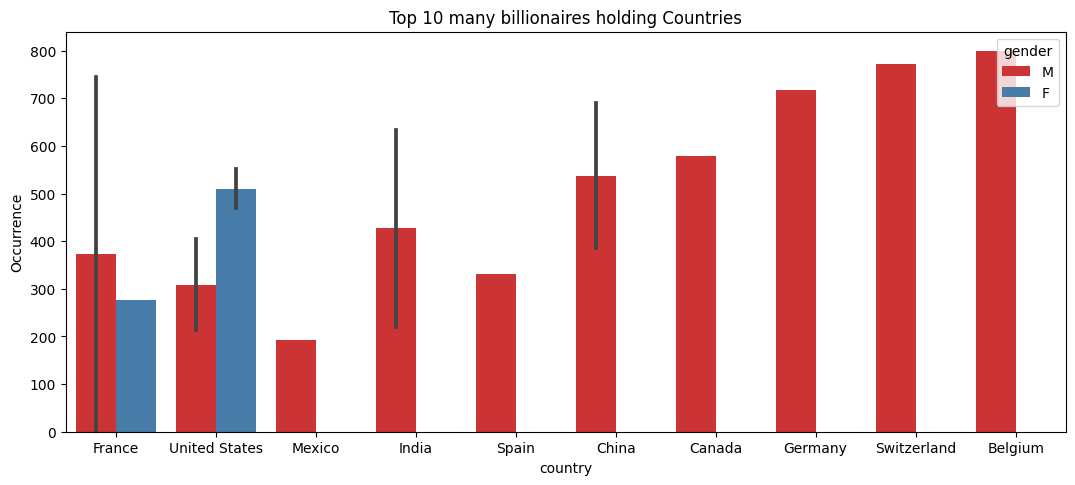

In [12]:
fig3=plt.figure(figsize=(10,4))
ax=fig3.add_axes([1,1,1,1])
y1=np.linspace(0,800,30)
sb.barplot(data=data.head(30),x=data.country.head(30),y=y1,ax=ax,hue='gender',palette='Set1')
ax.set_ylabel("Occurrence")
ax.set_title("Top 10 many billionaires holding Countries")

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Final Worth Occurence</p>
</div>


Text(0.5, 1.0, 'Final Worth Vs Occurence')

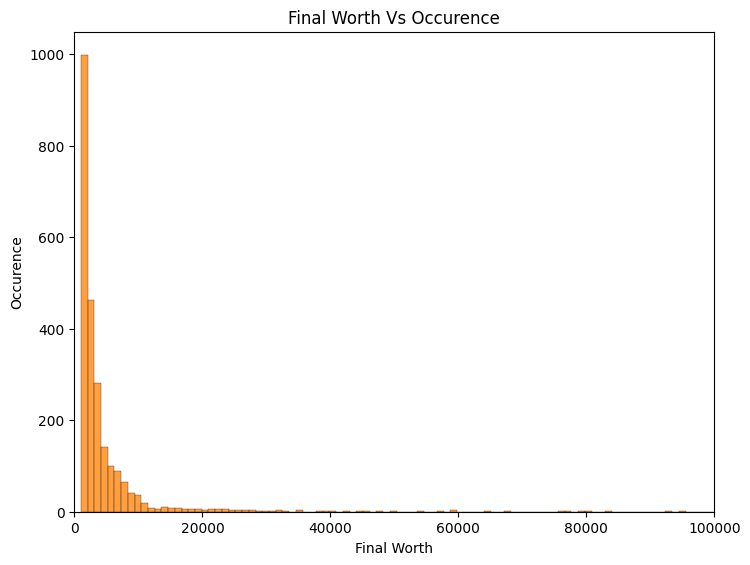

In [13]:
fig4=plt.figure()
ax=fig4.add_axes([1,1,1,1])
sb.histplot(data=data,x=data.finalWorth,ax=ax,bins=200,color=c1(0.5))
ax.set_xlim(0,100000)
ax.set_xlabel("Final Worth")
ax.set_ylabel('Occurence')
ax.set_title('Final Worth Vs Occurence')


In [14]:
val3=data[["country","cpi_country","cpi_change_country","gdp_country","gross_tertiary_education_enrollment","gross_primary_education_enrollment_country","life_expectancy_country","tax_revenue_country_country","total_tax_rate_country","population_country"]]

In [15]:
val3.drop_duplicates(inplace=True)

In [16]:
val3.dropna(inplace=True)

In [17]:
val3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 2375
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     63 non-null     object 
 1   cpi_country                                 63 non-null     float64
 2   cpi_change_country                          63 non-null     float64
 3   gdp_country                                 63 non-null     object 
 4   gross_tertiary_education_enrollment         63 non-null     float64
 5   gross_primary_education_enrollment_country  63 non-null     float64
 6   life_expectancy_country                     63 non-null     float64
 7   tax_revenue_country_country                 63 non-null     float64
 8   total_tax_rate_country                      63 non-null     float64
 9   population_country                          63 non-null     float64
dtypes: float64(8), obje

### TOP 20 CPI of countries
<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 CPI of Countries</p>
</div>


Text(0.5, 1.0, 'Top 20 CPI Countries')

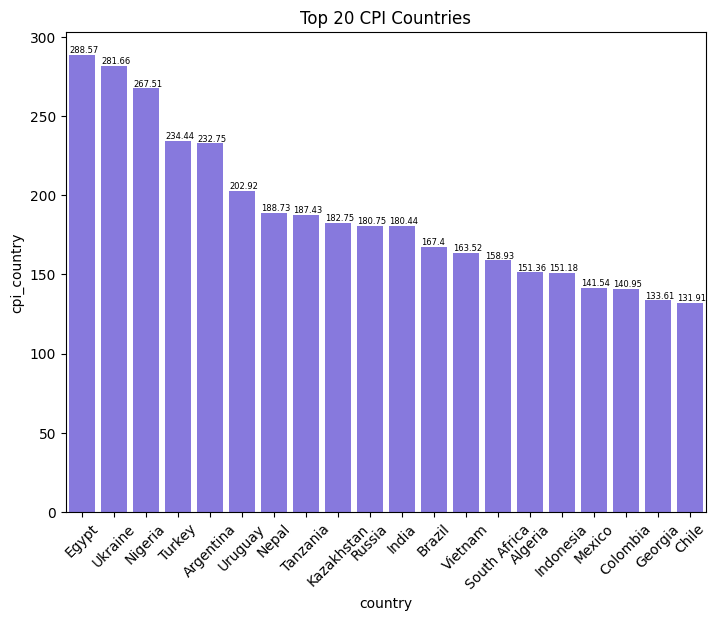

In [18]:
val3.sort_values(by='cpi_country',ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3["cpi_country"].head(20),ax=ax,color=colors[3])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=6)
plt.xticks(rotation=45)
plt.title('Top 20 CPI Countries')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 cpi_change_country</p>
</div>


Text(0.5, 1.0, 'Top 20 CPI Change Country')

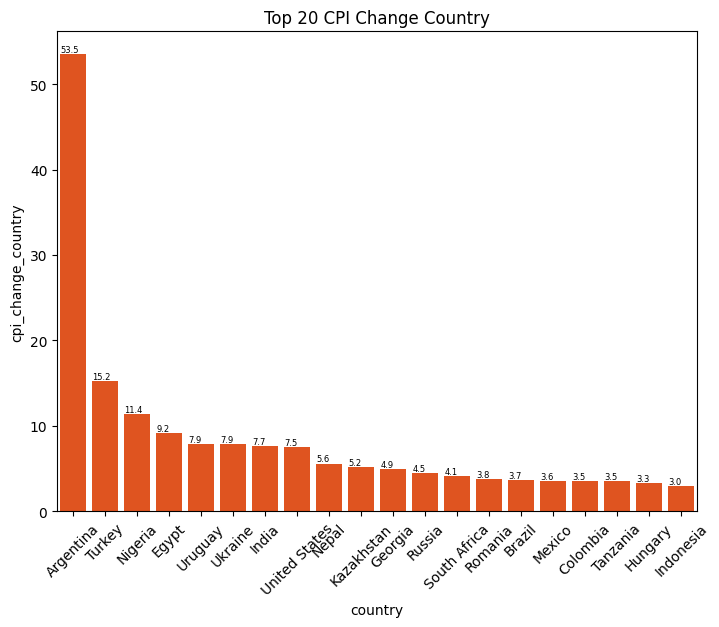

In [19]:
val3.sort_values(by='cpi_change_country',ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3["cpi_change_country"].head(20),ax=ax,color=colors[4])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=6)
plt.xticks(rotation=45)
plt.title('Top 20 CPI Change Country')



<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 GDP Countries</p>
</div>


Text(0.5, 1.0, 'Top 20 GDP Countries')

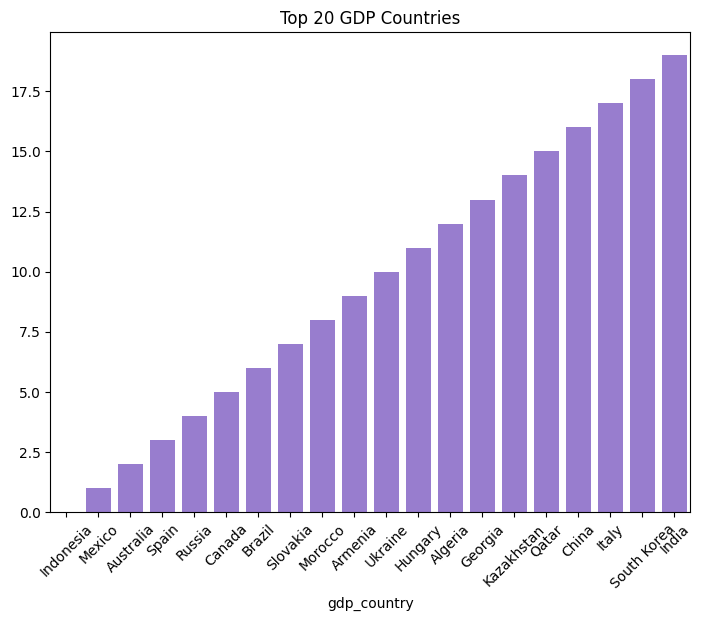

In [20]:
col=val3.columns
val3.sort_values(by=col[3],ascending=True,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
x=[i for i in range(20)]
sb.barplot(data=val3.head(20),y=x,x=val3[col[3]].head(20),ax=ax,color=colors[5])

plt.xticks(x,val3.country.head(20),rotation=45)
plt.title('Top 20 GDP Countries')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20  gross_tertiary_education_enrollment</p>
</div>


Text(0.5, 1.0, 'Top 20  gross_tertiary_education_enrollment')

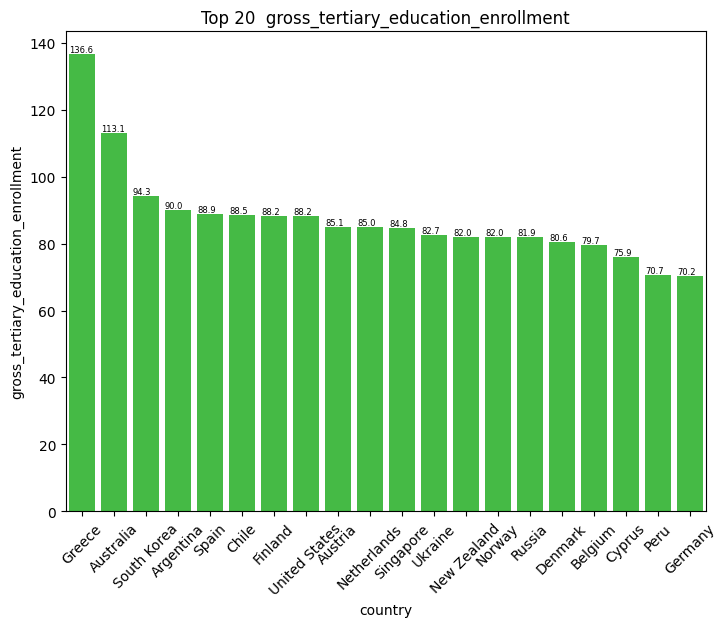

In [21]:
val3.sort_values(by=col[4],ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3[col[4]].head(20),ax=ax,color=colors[6])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=6)
plt.xticks(rotation=45)
plt.title('Top 20  gross_tertiary_education_enrollment')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 gross_primary_education_enrollment_country</p>
</div>


Text(0.5, 1.0, 'Top 20 gross_primary_education_enrollment_country')

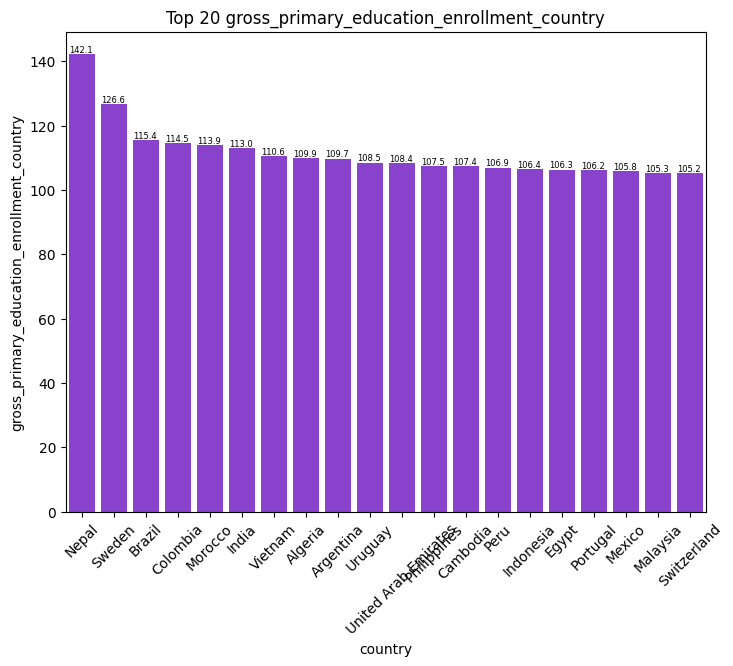

In [22]:
val3.sort_values(by=col[5],ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3[col[5]].head(20),ax=ax,color=colors[7])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=6)
plt.xticks(rotation=45)
plt.title('Top 20 gross_primary_education_enrollment_country')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 life_expectancy_country</p>
</div>


Text(0.5, 1.0, 'Top 20 life_expectancy_country')

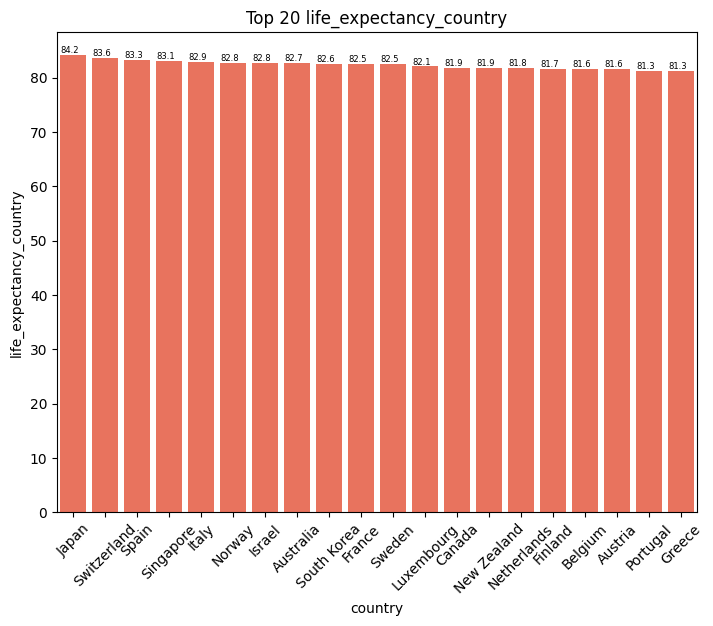

In [23]:
val3.sort_values(by=col[6],ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3[col[6]].head(20),ax=ax,color=colors[8])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=6)
plt.xticks(rotation=45)
plt.title('Top 20 life_expectancy_country')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 tax_revenue_country_country</p>
</div>


Text(0.5, 1.0, 'Top 20 tax_revenue_country_country')

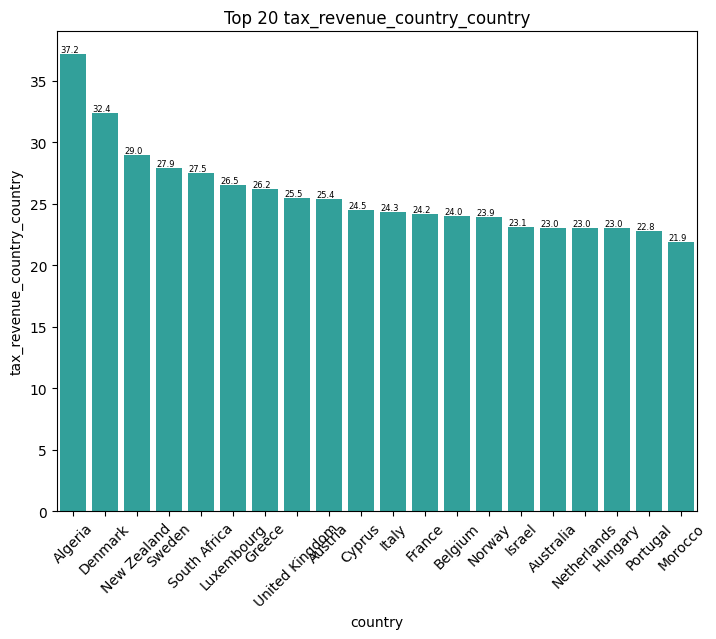

In [24]:
val3.sort_values(by=col[7],ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3[col[7]].head(20),ax=ax,color=colors[9])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=6)
plt.xticks(rotation=45)
plt.title('Top 20 tax_revenue_country_country')



<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 total_tax_rate_country</p>
</div>


Text(0.5, 1.0, 'Top 20 total_tax_rate_country')

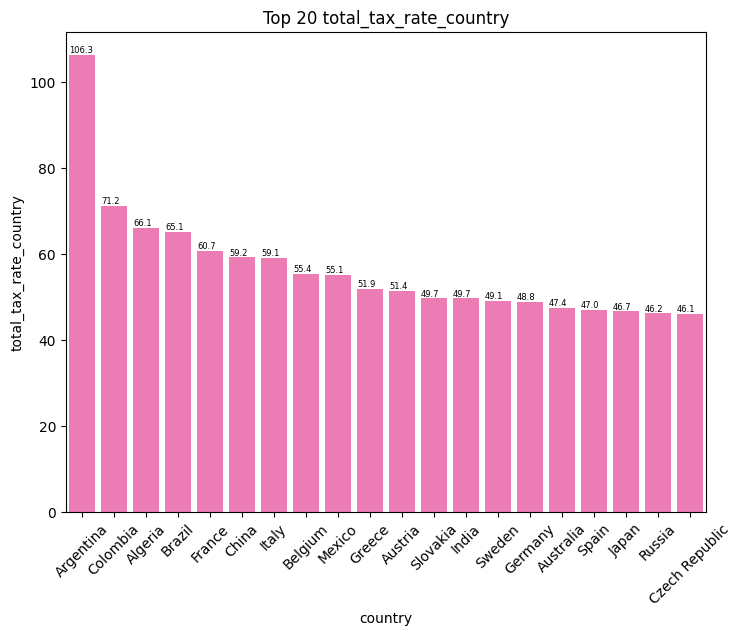

In [25]:
val3.sort_values(by=col[8],ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3[col[8]].head(20),ax=ax,color=colors[10])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=6)
plt.xticks(rotation=45)
plt.title('Top 20 total_tax_rate_country')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 20 Population Country</p>
</div>


Text(0.5, 1.0, 'Top 20 Population Country')

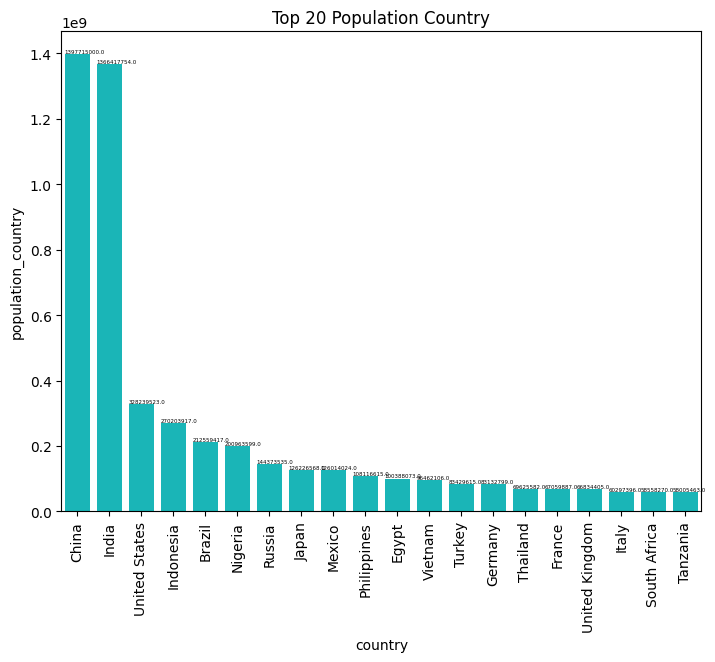

In [26]:
val3.sort_values(by=col[9],ascending=False,inplace=True)

fig5=plt.figure()
ax=fig5.add_axes([1,1,1,1])
sb.barplot(data=val3.head(20),x=val3.country.head(20),y=val3[col[9]].head(20),ax=ax,color=colors[11])
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x(),i.get_height()),va="bottom",fontsize=4)
ax.set_xticks(ax.get_xticks(),val3.country.head(20),rotation=90)
plt.title('Top 20 Population Country')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">To be Continue.Thank u for visiting</p>
